In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank11.csv to bank11 (1).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('bank11.csv')
print(data.head())
print(data.tail())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
     age          job  marital  education default  balance housing loan  \
794   49     services  m

In [ ]:
# Step 2: Preprocessing
# Separate target variable and encode it
y = data['balance'].apply(lambda val: 1 if val == 'yes' else 0)  # Binary encoding

# Drop the original target column from features
X = data.drop('balance', axis=1)

# Convert categorical features into dummy variables
X = pd.get_dummies(X, drop_first=True)



In [ ]:
# Step 3: Split the data (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Step 4: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 5: KNN Class Definition
def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

In [ ]:
# Step 6: Evaluate KNN for different k values
k_values = [1, 3, 5, 7, 9]
results = {}
for k in k_values:
    model = KNN(k=k)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)
    y_pred = model.predict(X_test)

    labels = np.unique(np.concatenate((y_test, y_pred)))
    target_names = ['No' if label == 0 else 'Yes' for label in labels]
    report = classification_report(y_test, y_pred, labels=labels, target_names=target_names)

    results[k] = {'accuracy': accuracy, 'classification_report': report}

    print(f"\nResults for k = {k}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(report)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Results for k = 1:
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       240

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Confusion Matrix:
[[240]]

Results for k = 3:
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       240

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Confusion Matrix:
[[240]]

Results for k = 5:
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       240

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
w

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th


Results for k = 9:
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       240

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Confusion Matrix:
[[240]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


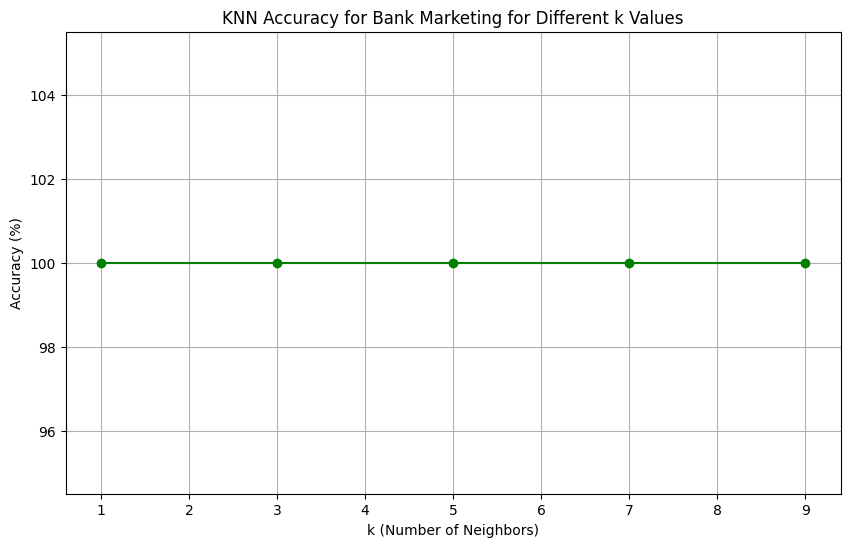

In [ ]:
# Step 7: Plot Accuracy vs k
accuracies = [results[k]['accuracy'] * 100 for k in k_values]
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='green')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('KNN Accuracy for Bank Marketing for Different k Values')
plt.grid(True)
plt.show()